In [2]:

# https://www.kaggle.com/shayanfazeli/heartbeat   # data set 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # plotting
import os
import sklearn
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate

Using TensorFlow backend.


In [3]:
# reading csv file  
normal=pd.read_csv("ptbdb_normal.csv",header=None) 
#normal.head(2) #for 2 rows
#normal.head() #for some top rows
#normal

abnormal=pd.read_csv("ptbdb_abnormal.csv",header=None) 
#abnormal

test=pd.read_csv("mitbih_test.csv",header=None) 
#test.head(2)
#test

train=pd.read_csv("mitbih_train.csv",header=None) 
#train

In [4]:
print("Type\tCount")
print((train[187]).value_counts())
#Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
# N- normal, S-supraventricular, V-ventricular, F-fusion, Q- unknown

Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


In [5]:
x1_train=train.iloc[:,0:187] 
print("x_train shape : ",x1_train.shape)

y1_train=train.iloc[:,187] 
print("y_train shape : ",y1_train.shape)


x1_test=test.iloc[:,0:187] 
print("x_test shape : ",x1_test.shape)

y1_test=test.iloc[:,187] 
print("y_test shape : ",y1_test.shape)



x_train shape :  (87554, 187)
y_train shape :  (87554,)
x_test shape :  (21892, 187)
y_test shape :  (21892,)


In [6]:
y_train=[]                              # making multiclass to binary class now y_train containing either 0 or 1 
for i in y1_train:
  if i not in  [0.0]:
    y_train.append(1)
    #print("value is",i)
  else:
    y_train.append(0)
    #print("value",i)
    
#print(type(y1))    
#print(y_train.shape)

In [7]:
y_test=[]                              # making multiclass to binary class.now y_test containing either 0 or 1 
for i in y1_test:
  if i not in  [0.0]:
    y_test.append(1)
    #print("value is",i)
  else:
    y_test.append(0)
    #print("value",i)
#print(y_test)

In [8]:
#create new df 
y_train = pd.DataFrame({'col':y_train})
#print (y_train)

y_test = pd.DataFrame({'col':y_test})
#print (y_test)


In [8]:
print("x_train shape : ",x1_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test shape : ",x1_test.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (87554, 187)
y_train shape :  (87554, 1)
x_test shape :  (21892, 187)
y_test shape :  (21892, 1)


In [10]:
x1_train[187] = y_train
x1_test[187] =  y_test

In [11]:
train=x1_train
test=x1_test

In [12]:
#print("Type\tCount")
a=(train[187]).value_counts()
#print(a)
print('train dataset Class 0 :', a[0])
print('train dataset Class 1 :', a[1])

#a.plot(kind='bar', title='Count of train classes');

print("****************************")

#print("Type\tCount")
b=(test[187]).value_counts()
#print(b)
print('test dataset Class 0 :', b[0])
print('test dataset Class 1 :', b[1])
#b.plot(kind='bar', title='Count of test classes');

train dataset Class 0 : 72471
train dataset Class 1 : 15083
****************************
test dataset Class 0 : 18118
test dataset Class 1 : 3774


In [13]:
# Class count
tr_count_class_0, tr_count_class_1=train[187].value_counts()
ts_count_class_0, ts_count_class_1=test[187].value_counts()

# Divide by class
tr_class_0 = train[train[187] == 0]
tr_class_1 = train[train[187] == 1]

ts_class_0 = test[test[187] == 0]
ts_class_1 = test[test[187] == 1]


Random over-sampling:
1    72471
0    72471
Name: 187, dtype: int64


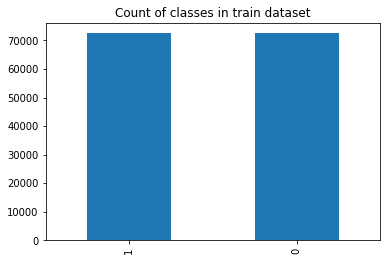

In [14]:
tr_class1_over = tr_class_1.sample(tr_count_class_0, replace=True)
train_over = pd.concat([tr_class_0, tr_class1_over], axis=0)

print('Random over-sampling:')

print(train_over[187].value_counts())

train_over[187].value_counts().plot(kind='bar', title='Count of classes in train dataset');

Random over-sampling:
1    18118
0    18118
Name: 187, dtype: int64


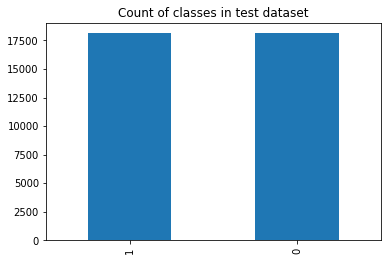

In [15]:
ts_class1_over = ts_class_1.sample(ts_count_class_0, replace=True)
test_over = pd.concat([ts_class_0, ts_class1_over], axis=0)

print('Random over-sampling:')

print(test_over[187].value_counts())

test_over[187].value_counts().plot(kind='bar', title='Count of classes in test dataset');

In [15]:
train=train_over
test=test_over

In [16]:
print("Type\tCount")
print((train[187]).value_counts())


print("***************************")

print("Type\tCount")
print((test[187]).value_counts())

Type	Count
1    72471
0    72471
Name: 187, dtype: int64
***************************
Type	Count
1    18118
0    18118
Name: 187, dtype: int64


In [17]:
x1_train=train.iloc[:,0:187] 
print("x_train shape : ",x1_train.shape)

y1_train=train.iloc[:,187] 
print("y_train shape : ",y1_train.shape)


x1_test=test.iloc[:,0:187] 
print("x_test shape : ",x1_test.shape)

y1_test=test.iloc[:,187] 
print("y_test shape : ",y1_test.shape)


x_train shape :  (144942, 187)
y_train shape :  (144942,)
x_test shape :  (36236, 187)
y_test shape :  (36236,)


In [18]:
from sklearn.preprocessing import StandardScaler
standardized_tr_data=StandardScaler().fit_transform(x1_train)
print(standardized_tr_data.shape)

standardized_ts_data=StandardScaler().fit_transform(x1_test)
print(standardized_ts_data.shape)



(144942, 187)
(36236, 187)


In [19]:
sample_tr_data=standardized_tr_data
labels_tr=y1_train
print("shape of train sample {0} and labels {1}".format(sample_tr_data.shape,y1_train.shape))

sample_ts_data=standardized_ts_data
labels_ts=y1_test
print("shape of test sample {0} and labels {1}".format(sample_ts_data.shape,y1_test.shape))

shape of train sample (144942, 187) and labels (144942,)
shape of test sample (36236, 187) and labels (36236,)


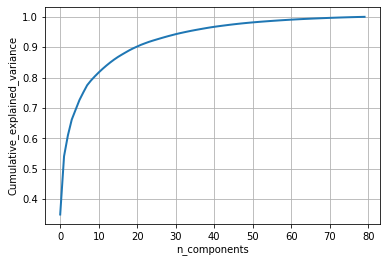

In [20]:
#for train data

from sklearn import decomposition
pca=decomposition.PCA()

pca.n_components = 80
tr_pca_data = pca.fit_transform(sample_tr_data)


percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_ )

cummulative_var_exp = np.cumsum(percentage_var_explained)





# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cummulative_var_exp, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


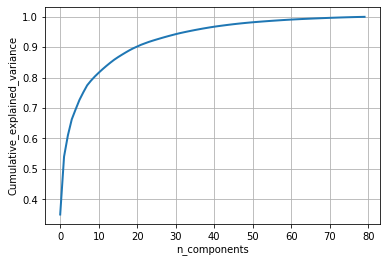

In [21]:
#for test data

from sklearn import decomposition
pca=decomposition.PCA()

pca.n_components = 80
ts_pca_data = pca.fit_transform(sample_ts_data)


percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_ )

cummulative_var_exp = np.cumsum(percentage_var_explained)





# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cummulative_var_exp, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [22]:
print(tr_pca_data.shape)
print(y1_train.shape)

print(ts_pca_data.shape)
print(y1_test.shape)



(144942, 80)
(144942,)
(36236, 80)
(36236,)


In [23]:
x_train1=tr_pca_data
y_train1=y1_train
x_test1=ts_pca_data
y_test1=y1_test

print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)

(144942, 80)
(144942,)
(36236, 80)
(36236,)


In [24]:
#K-Nearest Neighbours
a_knn=KNeighborsClassifier(n_neighbors=15)
a_knn.fit(x_train1,y_train1)
y_pred_knn=a_knn.predict(x_test1)

cm_knn=confusion_matrix(y_test1,y_pred_knn)
print(cm_knn)
print("********************************")

report_knn=classification_report(y_test1,y_pred_knn)
print(report_knn)

print("********************************")

Precision_knn= precision_score(y_test1, y_pred_knn,average='weighted')      
print('Precision of knn is : {0}'.format(Precision_knn))

Recall_knn= recall_score(y_test1, y_pred_knn,average='weighted')
print('Recall of knn is : {0}'.format(Recall_knn))

F1_score_knn= f1_score(y_test1, y_pred_knn,average='weighted')
print('F1_score of knn is : {0}'.format(F1_score_knn))

Accuracy_knn=accuracy_score(y_test1, y_pred_knn)
print("Accuracy of knn is : {0}".format(Accuracy_knn))


[[ 8233  9885]
 [ 2728 15390]]
********************************
              precision    recall  f1-score   support

           0       0.75      0.45      0.57     18118
           1       0.61      0.85      0.71     18118

    accuracy                           0.65     36236
   macro avg       0.68      0.65      0.64     36236
weighted avg       0.68      0.65      0.64     36236

********************************
Precision of knn is : 0.6800098379552862
Recall of knn is : 0.651920741803731
F1_score of knn is : 0.6377907784548835
Accuracy of knn is : 0.651920741803731


In [25]:
# SVM model
a_svm=svm.SVC(gamma='scale')
a_svm.fit(x_train1,y_train1)
y_pred_svm=a_svm.predict(x_test1)


#from sklearn.metrics import classification_report, confusion_matrix
cm_svm=confusion_matrix(y_test1,y_pred_svm)
print(cm_svm)
print("********************************")

report_svm=classification_report(y_test1,y_pred_svm)
print(report_svm)

#Precision=TP/(TP+FP)
#Recall=TP/(TP+FN)
#F1 Score=(2*Recall*Precision)/(Recall+Precision)
#Accuracy=(TP+TN)/(TP+TN+FN+FP)
#Accuracy_Score_svm=accuracy_score(y_test,y_pred_svm)
#print('Average Accuracy:%0.2f +/- (%0.1f) %%' % (Accuracy_Score_svm.mean()*100, Accuracy_Score_svm.std()*100))


print("********************************")


Accuracy_svm=accuracy_score(y_test1, y_pred_svm)
print("Accuracy of svm is : {0}".format(Accuracy_svm))

F1_score_svm= f1_score(y_test1, y_pred_svm,average='weighted')
print('F1_score of svm is : {0}'.format(F1_score_svm))

Recall_svm= recall_score(y_test1, y_pred_svm,average='weighted')
print('Recall of svm is : {0}'.format(Recall_svm))
      
Precision_svm= precision_score(y_test1, y_pred_svm,average='weighted')      
print('Precision of svm is : {0}'.format(Precision_svm))



[[11734  6384]
 [ 5595 12523]]
********************************
              precision    recall  f1-score   support

           0       0.68      0.65      0.66     18118
           1       0.66      0.69      0.68     18118

    accuracy                           0.67     36236
   macro avg       0.67      0.67      0.67     36236
weighted avg       0.67      0.67      0.67     36236

********************************
Accuracy of svm is : 0.6694171542112816
F1_score of svm is : 0.669260349261435
Recall of svm is : 0.6694171542112816
Precision of svm is : 0.6697390499762326


In [26]:
# Logistic Regression
a_lr=LogisticRegression()
a_lr.fit(x_train1,y_train1)
y_pred_lr=a_lr.predict(x_test1)

cm_lr=confusion_matrix(y_test1,y_pred_lr)
print(cm_lr)
print("********************************")

report_lr=classification_report(y_test1,y_pred_lr)
print(report_lr)

print("********************************")

Precision_lr= precision_score(y_test1, y_pred_lr,average='weighted')      
print('Precision of lr is : {0}'.format(Precision_lr))

Recall_lr= recall_score(y_test1, y_pred_lr,average='weighted')
print('Recall of lr is : {0}'.format(Recall_lr))

F1_score_lr= f1_score(y_test1, y_pred_lr,average='weighted')
print('F1_score of lr is : {0}'.format(F1_score_lr))

Accuracy_lr=accuracy_score(y_test1, y_pred_lr)
print("Accuracy of lr is : {0}".format(Accuracy_lr))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[10219  7899]
 [ 7271 10847]]
********************************
              precision    recall  f1-score   support

           0       0.58      0.56      0.57     18118
           1       0.58      0.60      0.59     18118

    accuracy                           0.58     36236
   macro avg       0.58      0.58      0.58     36236
weighted avg       0.58      0.58      0.58     36236

********************************
Precision of lr is : 0.5814534186580349
Recall of lr is : 0.5813555580086103
F1_score of lr is : 0.5812297771431669
Accuracy of lr is : 0.5813555580086103


In [27]:
#Naive Bayes
a_nb=GaussianNB()
a_nb.fit(x_train1,y_train1)
y_pred_nb=a_nb.predict(x_test1)

cm_nb=confusion_matrix(y_test1,y_pred_nb)
print(cm_nb)
print("********************************")

report_nb=classification_report(y_test1,y_pred_nb)
print(report_nb)

print("********************************")

Precision_nb= precision_score(y_test1, y_pred_nb,average='weighted')      
print('Precision of nb is : {0}'.format(Precision_nb))

Recall_nb= recall_score(y_test1, y_pred_nb,average='weighted')
print('Recall of nb is : {0}'.format(Recall_nb))

F1_score_nb= f1_score(y_test1, y_pred_nb,average='weighted')
print('F1_score of nb is : {0}'.format(F1_score_nb))

Accuracy_nb=accuracy_score(y_test1, y_pred_nb)
print("Accuracy of nb is : {0}".format(Accuracy_nb))


[[11382  6736]
 [ 3083 15035]]
********************************
              precision    recall  f1-score   support

           0       0.79      0.63      0.70     18118
           1       0.69      0.83      0.75     18118

    accuracy                           0.73     36236
   macro avg       0.74      0.73      0.73     36236
weighted avg       0.74      0.73      0.73     36236

********************************
Precision of nb is : 0.7387312150611883
Recall of nb is : 0.7290263826029363
F1_score of nb is : 0.7262442223861206
Accuracy of nb is : 0.7290263826029363


In [28]:
#Stochastic Gradient Descent
a_sgd=SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
a_sgd.fit(x_train1,y_train1)
y_pred_sgd=a_sgd.predict(x_test1)

cm_sgd=confusion_matrix(y_test1,y_pred_sgd)
print(cm_sgd)
print("********************************")

report_sgd=classification_report(y_test1,y_pred_sgd)
print(report_sgd)

print("********************************")

Precision_sgd= precision_score(y_test1, y_pred_sgd,average='weighted')      
print('Precision of sgd is : {0}'.format(Precision_sgd))

Recall_sgd= recall_score(y_test1, y_pred_sgd,average='weighted')
print('Recall of sgd is : {0}'.format(Recall_sgd))

F1_score_sgd= f1_score(y_test1, y_pred_sgd,average='weighted')
print('F1_score of sgd is : {0}'.format(F1_score_sgd))

Accuracy_sgd=accuracy_score(y_test1, y_pred_sgd)
print("Accuracy of sgd is : {0}".format(Accuracy_sgd))

[[10195  7923]
 [ 7476 10642]]
********************************
              precision    recall  f1-score   support

           0       0.58      0.56      0.57     18118
           1       0.57      0.59      0.58     18118

    accuracy                           0.58     36236
   macro avg       0.58      0.58      0.57     36236
weighted avg       0.58      0.58      0.57     36236

********************************
Precision of sgd is : 0.575081577158033
Recall of sgd is : 0.575035875924495
F1_score of sgd is : 0.574971198472135
Accuracy of sgd is : 0.575035875924495


In [29]:
# Decision Binary Tree
a_dt=DecisionTreeClassifier(max_depth=10,random_state=101,max_features= None, min_samples_leaf=15)
a_dt.fit(x_train1,y_train1)
y_pred_dt=a_dt.predict(x_test1)

cm_dt=confusion_matrix(y_test1,y_pred_dt)
print(cm_dt)
print("********************************")

report_dt=classification_report(y_test1,y_pred_dt)
print(report_dt)

print("********************************")

Precision_dt= precision_score(y_test1, y_pred_dt,average='weighted')      
print('Precision of dt is : {0}'.format(Precision_dt))

Recall_dt= recall_score(y_test1, y_pred_nb,average='weighted')
print('Recall of dt is : {0}'.format(Recall_dt))

F1_score_dt= f1_score(y_test1, y_pred_dt,average='weighted')
print('F1_score of dt is : {0}'.format(F1_score_dt))

Accuracy_dt=accuracy_score(y_test1, y_pred_dt)
print("Accuracy of dt is : {0}".format(Accuracy_dt))

[[11916  6202]
 [ 7954 10164]]
********************************
              precision    recall  f1-score   support

           0       0.60      0.66      0.63     18118
           1       0.62      0.56      0.59     18118

    accuracy                           0.61     36236
   macro avg       0.61      0.61      0.61     36236
weighted avg       0.61      0.61      0.61     36236

********************************
Precision of dt is : 0.6103708321368623
Recall of dt is : 0.7290263826029363
F1_score of dt is : 0.6084233927460679
Accuracy of dt is : 0.6093387791146926


In [30]:
# Random Forest Classifier
a_rf=RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1,random_state=101,max_features=None,min_samples_leaf=30)
a_rf.fit(x_train1,y_train1)
y_pred_rf=a_rf.predict(x_test1)


cm_rf=confusion_matrix(y_test1,y_pred_rf)
print(cm_rf)
print("********************************")

report_rf=classification_report(y_test1,y_pred_rf)
print(report_rf)

print("********************************")

Precision_rf= precision_score(y_test1, y_pred_rf,average='weighted')      
print('Precision of rf model is : {0}'.format(Precision_rf))

Recall_rf= recall_score(y_test1, y_pred_rf,average='weighted')
print('Recall of rf model is : {0}'.format(Recall_rf))

F1_score_rf= f1_score(y_test1, y_pred_rf,average='weighted')
print('F1_score of rf model is : {0}'.format(F1_score_rf))

Accuracy_rf=accuracy_score(y_test1, y_pred_rf)
print("Accuracy of rf model is : {0}".format(Accuracy_rf))

[[13746  4372]
 [ 6900 11218]]
********************************
              precision    recall  f1-score   support

           0       0.67      0.76      0.71     18118
           1       0.72      0.62      0.67     18118

    accuracy                           0.69     36236
   macro avg       0.69      0.69      0.69     36236
weighted avg       0.69      0.69      0.69     36236

********************************
Precision of rf model is : 0.692679325024294
Recall of rf model is : 0.6889281377635501
F1_score of rf model is : 0.6874067031300409
Accuracy of rf model is : 0.6889281377635501


In [31]:

models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes','Stochastic Gradient Descent'],
    'Accuracy'    : [Accuracy_lr,   Accuracy_dt,   Accuracy_svm,    Accuracy_rf,   Accuracy_knn,   Accuracy_nb,   Accuracy_sgd],
    'Precision'   : [Precision_lr,  Precision_dt,  Precision_svm,   Precision_rf,  Precision_knn,  Precision_nb,  Precision_sgd],
    'Recall'      : [Recall_lr,     Recall_dt,     Recall_svm,      Recall_rf,     Recall_knn,     Recall_nb,     Recall_sgd],
    'F1_score'    : [F1_score_lr,   F1_score_dt,   F1_score_svm,    F1_score_rf,   F1_score_knn,   F1_score_nb,   F1_score_sgd],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score'])

models_initial.sort_values(by='Accuracy', ascending=False)



,Model,Accuracy,Precision,Recall,F1_score
5,Naive Bayes,0.729026,0.738731,0.729026,0.726244
3,Random Forest,0.688928,0.692679,0.688928,0.687407
2,Support Vector Machine,0.669417,0.669739,0.669417,0.669260
4,K-Nearest Neighbors,0.651921,0.680010,0.651921,0.637791
1,Decision Tree,0.609339,0.610371,0.729026,0.608423
0,Logistic Regression,0.581356,0.581453,0.581356,0.581230
6,Stochastic Gradient Descent,0.575036,0.575082,0.575036,0.574971


In [ ]:
#Model                        Accuracy        Precision             Recall         F1_score
#Naive Bayes                   0.729026         0.738731             0.729026        0.726244
#Random Forest                 0.688928         0.692679             0.688928        0.687407
#Support Vector Machine        0.669417         0.669739             0.669417        0.669260
#K-Nearest Neighbors           0.651921         0.680010             0.651921        0.637791
#Decision Tree                 0.609339         0.610371             0.729026        0.608423
#Logistic Regression           0.581356         0.581453             0.581356        0.581230
#Stochastic Gradient Descent   0.575036         0.575082             0.575036        0.574971
